In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_recall_fscore_support

In [2]:
from google.colab import files
datasets = files.upload()

Saving lung-cancer.csv to lung-cancer (1).csv


In [2]:
data = pd.read_csv('lung-cancer.csv')
data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [ ]:
# load dataset
#from google.colab import drive

#drive.mount('/drive')
#data = pd.read_csv('/drive/My Drive/Colab Notebooks/LungCancerDataset.csv')
#data.head()

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [3]:
data = data.drop(['SMOKING', 'SHORTNESS OF BREATH'], axis=1)

In [4]:
data['GENDER'].replace(['M', 'F'], [0, 1], inplace=True)
data['LUNG_CANCER'].replace(['NO', 'YES'], [0, 1], inplace=True)
data.drop_duplicates(inplace=True)
data

,GENDER,AGE,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,69,2,2,1,1,2,1,2,2,2,2,2,1
1,0,74,1,1,1,2,2,2,1,1,1,2,2,1
2,1,59,1,1,2,1,2,1,2,1,2,1,2,0
3,0,63,2,2,1,1,1,1,1,2,1,2,2,0
4,1,63,2,1,1,1,1,1,2,1,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,1,59,2,2,2,1,1,2,2,1,2,2,1,1
280,1,59,1,1,1,2,2,2,1,1,1,1,1,0
281,0,55,1,1,1,1,2,2,1,1,1,1,2,0
282,0,46,2,2,1,1,1,1,1,1,1,2,2,0


In [5]:
q = data["AGE"].quantile(0.99)
data[data["AGE"] < q]
q_low = data["AGE"].quantile(0.01)
q_hi  = data["AGE"].quantile(0.99)

filtered_data = data[(data["AGE"] < q_hi) & (data["AGE"] > q_low)]

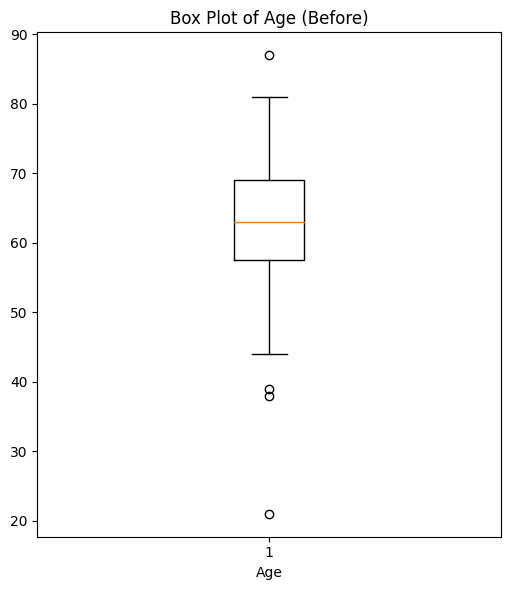

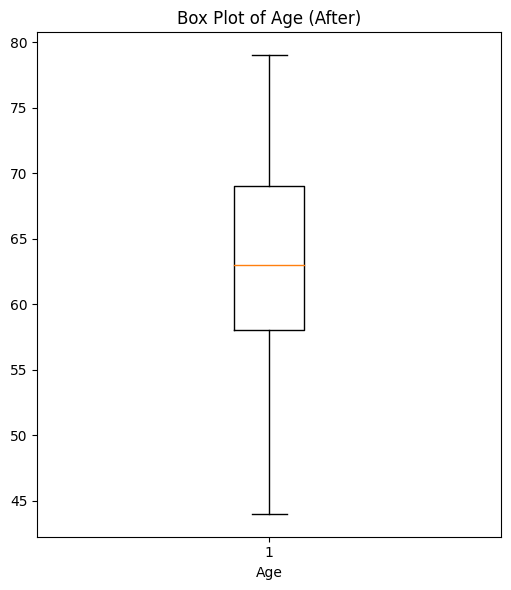

In [6]:
import matplotlib.pyplot as plt

# Box plot before removing outliers
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.boxplot(data['AGE'])
plt.title('Box Plot of Age (Before)')
plt.xlabel('Age')

plt.tight_layout()
plt.show()

# Box plot after removing outliers
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.boxplot(filtered_data['AGE'])
plt.title('Box Plot of Age (After)')
plt.xlabel('Age')

plt.tight_layout()
plt.show()

In [7]:
#y = data['LUNG_CANCER']
#X = data.drop('LUNG_CANCER',axis=1)

y = filtered_data['LUNG_CANCER']
X = filtered_data.drop('LUNG_CANCER',axis=1)

for i in X.columns[2:]:
    temp=[]
    for j in X[i]:
        temp.append(j-1)
    X[i]=temp
X

,GENDER,AGE,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN
0,0,69,1,1,0,0,1,0,1,1,1,1,1
1,0,74,0,0,0,1,1,1,0,0,0,1,1
2,1,59,0,0,1,0,1,0,1,0,1,0,1
3,0,63,1,1,0,0,0,0,0,1,0,1,1
4,1,63,1,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,1,59,1,1,1,0,0,1,1,0,1,1,0
280,1,59,0,0,0,1,1,1,0,0,0,0,0
281,0,55,0,0,0,0,1,1,0,0,0,0,1
282,0,46,1,1,0,0,0,0,0,0,0,1,1


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state = 42)

In [9]:
from imblearn.over_sampling import RandomOverSampler
X_train,y_train=RandomOverSampler().fit_resample(X_train,y_train)

In [10]:
X.shape

(269, 13)

In [11]:
scaler = StandardScaler()
X_train['AGE'] = scaler.fit_transform(X_train[['AGE']])
X_val['AGE'] = scaler.transform(X_val[['AGE']])
X_test['AGE'] = scaler.transform(X_test[['AGE']])

print(scaler.mean_)
print(scaler.var_)

[63.00357143]
[44.19641582]


In [27]:
del model

In [28]:
from tensorflow.keras import initializers
initializer = tf.keras.initializers.HeNormal(seed=0)

from tensorflow.keras import initializers

model = Sequential(
    [
        Dense(3, activation = 'relu', input_shape=[13]),
        #Dense(3, activation = 'relu'),
        Dense(1, activation = 'sigmoid'),
    ]
)

In [29]:
model.build()

In [30]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 3)                 42        
                                                                 
 dense_7 (Dense)             (None, 1)                 4         
                                                                 
Total params: 46
Trainable params: 46
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

history = model.fit(X_train, y_train, 
                        epochs=100, batch_size=16,
                        validation_data=(X_val, y_val), 
                        shuffle=True)

Epoch 1/100
18/18 [==============================] - 1s 13ms/step - loss: 0.6804 - accuracy: 0.5786 - val_loss: 0.7044 - val_accuracy: 0.5926
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 0.6694 - accuracy: 0.6214 - val_loss: 0.6916 - val_accuracy: 0.6296
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 0.6596 - accuracy: 0.6500 - val_loss: 0.6781 - val_accuracy: 0.6296
Epoch 4/100
18/18 [==============================] - 0s 5ms/step - loss: 0.6506 - accuracy: 0.6821 - val_loss: 0.6678 - val_accuracy: 0.6296
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 0.6421 - accuracy: 0.6714 - val_loss: 0.6569 - val_accuracy: 0.6667
Epoch 6/100
18/18 [==============================] - 0s 5ms/step - loss: 0.6342 - accuracy: 0.6821 - val_loss: 0.6454 - val_accuracy: 0.6852
Epoch 7/100
18/18 [==============================] - 0s 5ms/step - loss: 0.6267 - accuracy: 0.7036 - val_loss: 0.6328 - val_accuracy: 0.7037
Epoch 8/100


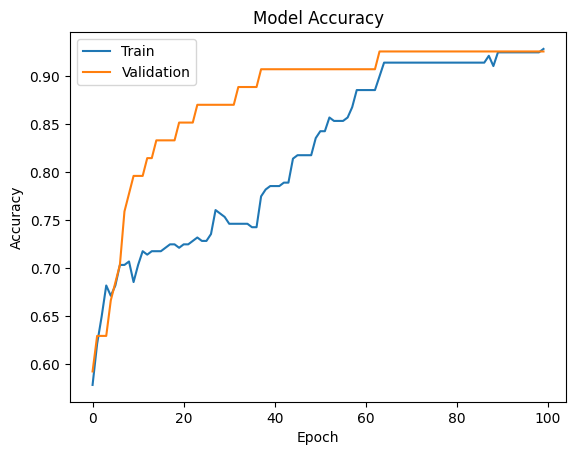

In [32]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Model Accuracy')
plt.legend(loc='upper left')

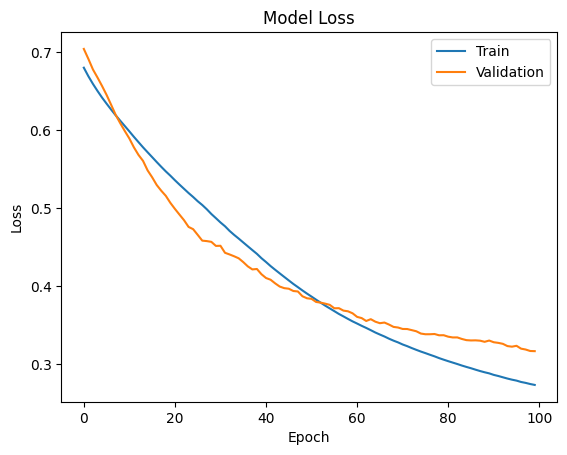

In [33]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Model Loss')
plt.legend(loc='upper right')

In [34]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

2/2 [==============================] - 0s 8ms/step - loss: 0.2849 - accuracy: 0.9259
Test loss: 0.2848879396915436
Test accuracy: 0.9259259104728699


2/2 [==============================] - 0s 5ms/step

Confusion Matrix


Text(50.722222222222214, 0.5, 'True')

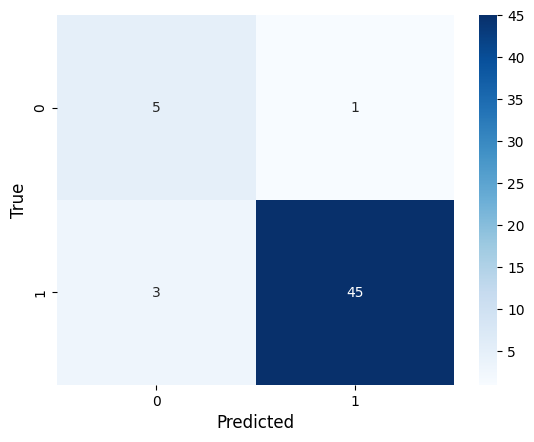

In [35]:
from sklearn.metrics import precision_recall_fscore_support
y_true = y_test
y_pred = model.predict(X_test)

# Make the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_true.round(), y_pred.round())
print("\nConfusion Matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

In [36]:
print(classification_report(y_true.round(),y_pred.round()))

              precision    recall  f1-score   support

           0       0.62      0.83      0.71         6
           1       0.98      0.94      0.96        48

    accuracy                           0.93        54
   macro avg       0.80      0.89      0.84        54
weighted avg       0.94      0.93      0.93        54



In [37]:
print(model.trainable_variables) 

[<tf.Variable 'dense_6/kernel:0' shape=(13, 3) dtype=float32, numpy=
array([[ 0.22856413,  0.9581196 ,  1.098346  ],
       [ 0.09043175, -0.09750454, -0.11918425],
       [-1.0592133 , -0.3919371 ,  0.53193176],
       [ 0.22457379, -0.9068676 ,  0.01545892],
       [-0.640647  , -0.02559297,  0.22234248],
       [-0.2624264 ,  0.3158939 ,  0.36663362],
       [ 0.99429053, -0.40164402,  1.3030186 ],
       [ 0.25115097, -1.3597553 ,  1.3257499 ],
       [-0.572197  ,  0.6855547 ,  0.7835706 ],
       [-0.39854282, -1.3150477 ,  0.3776737 ],
       [-0.4048349 ,  0.57613057,  0.825372  ],
       [-0.29781833, -0.7078291 ,  0.4722756 ],
       [-0.48133048, -0.18095401, -0.22304021]], dtype=float32)>, <tf.Variable 'dense_6/bias:0' shape=(3,) dtype=float32, numpy=array([ 0.33677074,  0.68685997, -0.8980267 ], dtype=float32)>, <tf.Variable 'dense_7/kernel:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.9778448 ],
       [-1.6289837 ],
       [ 0.94104785]], dtype=float32)>, <tf.Variable

In [38]:
!mkdir -p saved_model
model.save('saved_model/my_model')

In [39]:
model.save('my_model.h5')

In [40]:
from google.colab import files

files.download('saved_model/my_model/variables/variables.data-00000-of-00001')
files.download('saved_model/my_model/variables/variables.index')
files.download('saved_model/my_model/fingerprint.pb')
files.download('saved_model/my_model/keras_metadata.pb')
files.download('saved_model/my_model/saved_model.pb')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [41]:
files.download('my_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [42]:
new_model = tf.keras.models.load_model('my_model.h5')

In [43]:
loss, acc = new_model.evaluate(X_test, y_test)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

2/2 [==============================] - 0s 10ms/step - loss: 0.2849 - accuracy: 0.9259
Restored model, accuracy: 92.59%


In [51]:
#Manual Scale
mean = 63.003
vari = 44.196
input_x = 57
scale_final = (input_x - mean) / vari

print(scale_final)

-0.13582677165354332


In [52]:
X_new = [[0,-0.135827,1,0,0,0,1,0,1,1,1,1,1]]
new_model.predict(X_new)

# 1 - POSITIVE
# 0 - NEGATIVE

1/1 [==============================] - 0s 80ms/step


array([[0.90873015]], dtype=float32)

In [46]:
type(X_test)

pandas.core.frame.DataFrame

In [47]:
prediction = new_model.predict(X_test)
data_ans = pd.DataFrame({'LUNG CANCER' :y_test})
data_ans['Prediction'] = np.round_(prediction)

2/2 [==============================] - 0s 9ms/step


In [48]:
data_ans

,LUNG CANCER,Prediction
31,1,1.0
123,1,1.0
80,0,0.0
134,1,1.0
197,1,1.0
144,1,1.0
210,1,1.0
46,1,1.0
180,1,1.0
250,1,1.0


In [49]:
X_test.iloc[1]

GENDER                   1.000000
AGE                      0.450724
YELLOW_FINGERS           1.000000
ANXIETY                  1.000000
PEER_PRESSURE            0.000000
CHRONIC DISEASE          1.000000
FATIGUE                  1.000000
ALLERGY                  1.000000
WHEEZING                 1.000000
ALCOHOL CONSUMING        1.000000
COUGHING                 1.000000
SWALLOWING DIFFICULTY    0.000000
CHEST PAIN               0.000000
Name: 123, dtype: float64